# Homework 2. Попов Николай
* Домашку присылать в виде `.pdf` файла на адрес `homework@merkulov.top`. 
* Дедлайн: **8 мая 23:59**.
* Есть несколько способов конвертировать `.ipynb` в `.pdf`. Самый простой - сохранить ноутбук как `.html`, а затем распечатать это в `.pdf` файл, нажав `ctrl + P` в браузере. 
* Займитесь этим вопросом заранее, чтобы в последний момент не получить из за этого 0 баллов. 
* Все ячейки должны быть запущены, а графики построены.


## Problem 1. Обо всем по чуть чуть. Деревня Хоббитцов.

[Источник](https://courses.cs.ut.ee/MTAT.03.227/2015_spring/uploads/Main/home-exercises-5.pdf)


In [0]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Для Вашего удобства ниже написана функция, которая рисует небольшую одномерную деревню.

In [0]:
def plot_village(coordinates, l=1):
    # Checking, that all the coordinates are less than l
    assert (coordinates <= l).all(), 'All the houses should be in a village'
    
    # Draw horizontal line
    plt.hlines(0, 0, l)
    plt.xlim(0, l)
    plt.ylim(-0.5, 0.5)
    
    # Draw house points
    # plt.style.use('seaborn-whitegrid')
    y = np.zeros(np.shape(coordinates))
    plt.title('The Hobbit Village')
    plt.plot(coordinates,y,'o',ms = 10)
    plt.axis('off')
    plt.xlabel('Coordinates')
    fig = plt.gcf()
    fig.set_size_inches(15, 1)
    plt.show()

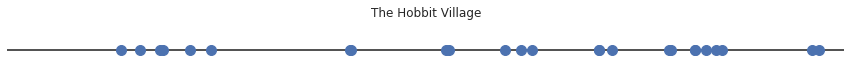

In [0]:
N = 25
l = 1
x = np.random.rand(N)*l
    
plot_village(x, l)

Жители одномерной деревни хотят подключиться к интернету, для этого им необходимо поставить центральную обслуживающую станцию, от которой кабель будет тянуться ко всем домам деревни. Пусть цена кабеля, который надо тянуть от станции до каждого дома независимо, определяется некоторой функцией $p(d)$. Тогда ясно, что деревне придется заплатить следующую сумму за доступ в мировую паутину:
$$
P(w, x) = \sum\limits_{i=1}^N p(d_i) = \sum\limits_{i=1}^N p(|w - x_i|)
$$
Здесь $w$ - координата станции, $x_i$ - координата i-ого домика.

### 🤔
Найдите аналитически оптимальную позицию $w^*$, доставляющую минимум функции $P(w, x)$ при условии, что $p(d) = d^2$

$$ P(w) = \sum_{i=1}^{N}(w-x_i)^2;~~P'(w) = 2\sum_{i=1}^{N}(w-x_i)=2Nw - 2\sum_{i=1}^{N}x_i;~~P'(w_0) = 0 \Rightarrow w_0 = \dfrac{1}{N}\sum_{i=1}^{N}x_i;~~P''(w) = 2N > 0\Rightarrow w_0 - \text{точка минимума}.$$

### 🤔
Напишите функцию `P`, которая берет на вход позицию станции $w$ и вектор координат $x$ и возвращает значение функции потерь $P$.

In [0]:
def P(w, x):
    P = 0
    for i in x:
        P += (w - i)**2
    return P

Постройте значение функции потерь для значения координат от $0$ до $l$.

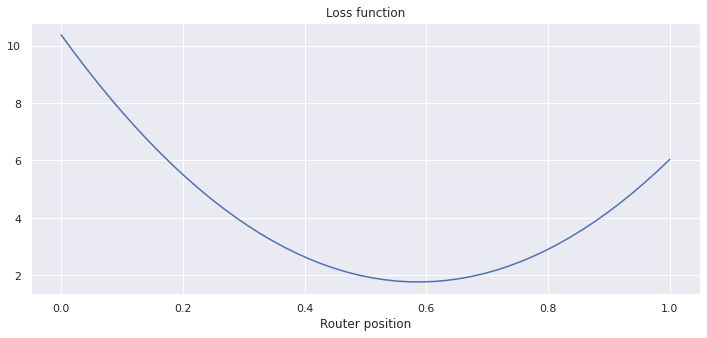

In [0]:
w = np.linspace(0,l)
p = [P(w_i, x) for w_i in w]
plt.title('Loss function')
plt.xlabel('Router position')
plt.plot(w,p)
fig = plt.gcf()
fig.set_size_inches(12, 5)

### 🤔
Напишите функцию `dP`, которая берет на вход позицию станции $w$ и вектор координат $x$ и возвращает значение градиента функции потерь $\nabla P$ как функции от $w$.

In [0]:
def dP(w, x):
    dP = 2 * N * w - 2 * sum(x)
    return dP

Постройте значение функции `dP` для значения координат от $0$ до $l$. Какая точка на графике представляет особый интерес? Почему?

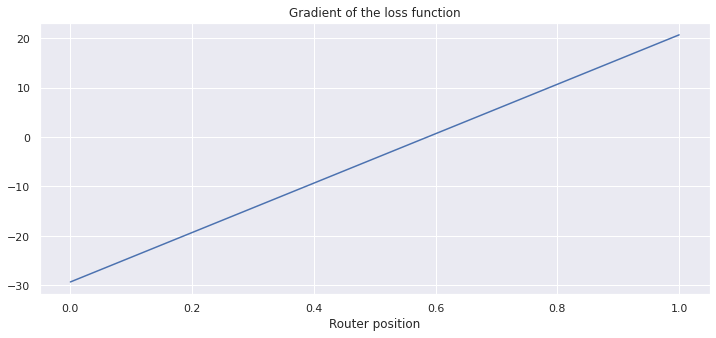

In [0]:
w = np.linspace(0,l)
dp = [dP(w_i, x) for w_i in w]
plt.title('Gradient of the loss function')
plt.xlabel('Router position')
plt.plot(w,dp)
fig = plt.gcf()
fig.set_size_inches(12, 5)

###Интерес представляет точка, в которой градиент равен нулю, поскольку для квадратичной функции на отрезке это точка глобального минимума.

### 🤔
Напишите функцию `gradient_descent`, которая возвращает значение $w_k$ через фиксированное число шагов. Длина функции не должна превышать 5 строчек кода.

$$
w_{k+1} = w_k - \mu \nabla P(w_k)
$$

In [0]:
def gradient_descent(x, dP, w0, mu, Nsteps):
    w_k = w0
    for _ in range(Nsteps):
        w_k = w_k - mu * dP(w_k, x)
    return w_k

### 🤔
Модифицируйте функцию `gradient_descent` так, чтобы она возвращала всю траекторию оптимизации (все значения $w_k$). Постройте графики $P(w_k ,x)$ для $\mu = 0.01, 0.1, 0.15, 0.19, 0.20, 0.21$ . Сделайте выводы.

In [0]:
def gradient_descent_total(x, dP, w0, mu, accuracy):
    trajectory = []
    w_k = w0
    trajectory.append(w_k)
    while abs(dP(w_k, x)) > accuracy:
        # print(dP(w_k, x),'     ', w_k)
        w_k = w_k - mu * dP(w_k, x)
        trajectory.append(w_k)
    return trajectory

##Графики

тут все норм сходится

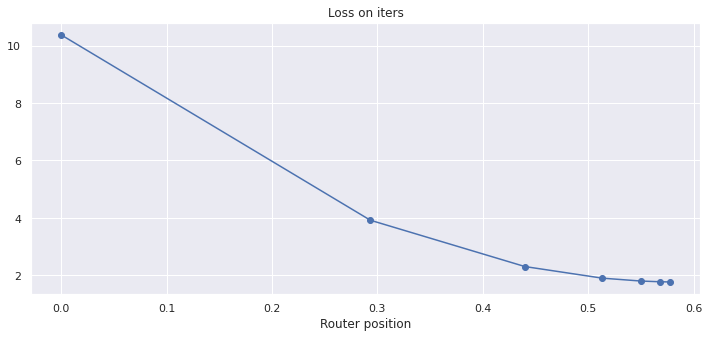

In [0]:
mu = 0.01
ws = gradient_descent_total(x, dP, 0, mu, 0.5)
Ps = [P(w_i, x) for w_i in ws]
# print(Ps)
plt.title('Loss on iters')
plt.xlabel('Router position')
plt.plot(ws,Ps)
plt.scatter(ws,Ps)
# plt.show()
fig = plt.gcf()
fig.set_size_inches(12, 5)

тут шаг по оси w увеличился на каждой итерации

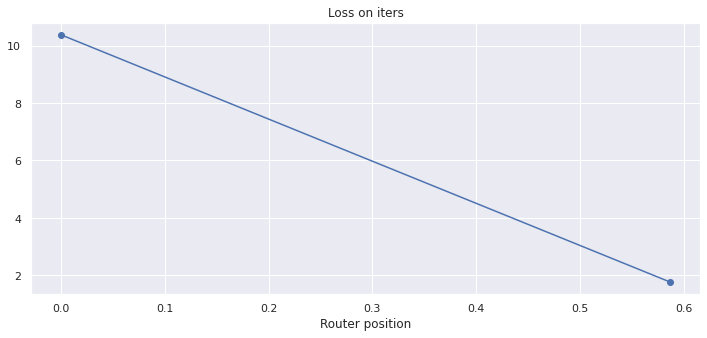

In [0]:
mu = 0.02
ws = gradient_descent_total(x, dP, 0, mu, 0.5)
Ps = [P(w_i, x) for w_i in ws]
# print(Ps)
plt.title('Loss on iters')
plt.xlabel('Router position')
plt.plot(ws,Ps)
plt.scatter(ws,Ps)
# plt.show()
fig = plt.gcf()
fig.set_size_inches(12, 5)

Тут шаг еще больше и метод начинает уносить влево-вправо от минимума из-за большой величины $$\mu*\nabla P(w_k)$$, хотя сходимость еще есть

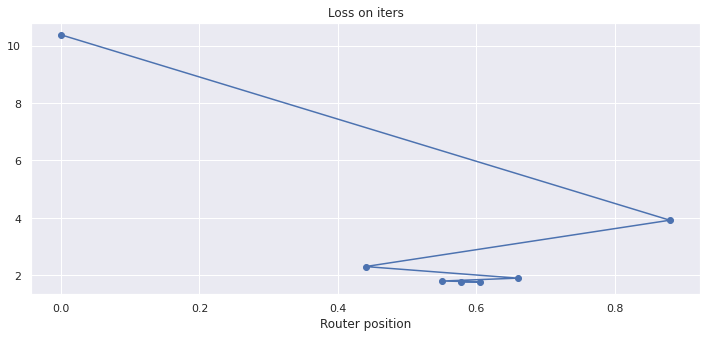

In [0]:
mu = 0.03
ws = gradient_descent_total(x, dP, 0, mu, 0.5)
Ps = [P(w_i, x) for w_i in ws]
# print(Ps)
plt.title('Loss on iters')
plt.xlabel('Router position')
plt.plot(ws,Ps)
plt.scatter(ws,Ps)
# plt.show()
fig = plt.gcf()
fig.set_size_inches(12, 5)

Тут разнос влево вправо увеличивается от итерации к итерации и точки $w_k$ сильно отдалются от минимума

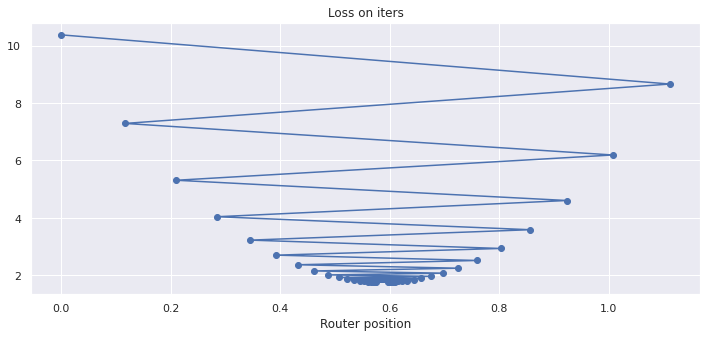

In [0]:
mu = 0.0379
ws = gradient_descent_total(x, dP, 0, mu, 0.5)
Ps = [P(w_i, x) for w_i in ws]
# print(Ps)
plt.title('Loss on iters')
plt.xlabel('Router position')
plt.plot(ws,Ps)
plt.scatter(ws,Ps)
# plt.show()
fig = plt.gcf()
fig.set_size_inches(12, 5)

### 🤔
Напишите функцию `ddP`, которая берет на вход позицию станции $w$ и вектор координат $x$ и возвращает значение гессиана функции потерь $\nabla^2 P$ как функции от $w$.

In [0]:
def ddP(w, x):
    ddP = 2 * N
    return ddP

Постройте значение функции `ddP` для значения координат от $0$ до $l$.

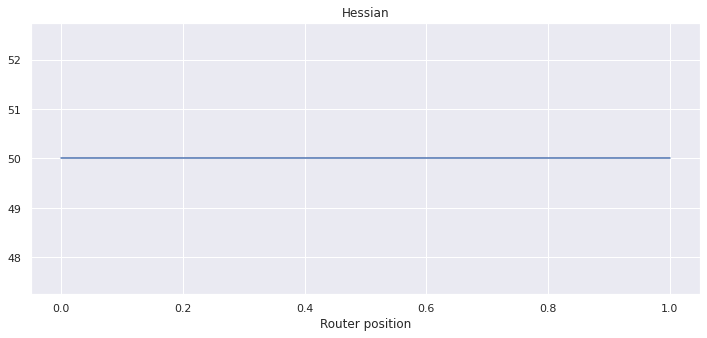

In [0]:
w = np.linspace(0,l)
ddp = [ddP(w_i, x) for w_i in w]
plt.title('Hessian')
plt.xlabel('Router position')
plt.plot(w,ddp)
fig = plt.gcf()
fig.set_size_inches(12, 5)

### 🤔
Напишите функцию `newton_descent`, которая возвращает всю оптимизационную траекторию $(w_k)$ через фиксированное число шагов.

In [0]:
def newton_descent(x, dP, ddP, w0, Nsteps):
    trajectory = []
    w_k = w0
    trajectory.append(w_k)
    for _ in range(Nsteps):
        grad = dP(w_k, x)
        hess = ddP(w_k, x)
        # h = np.linalg.solve(hess, (-1) * grad)
        h = (-1) * grad / hess
        w_k = w_k + h
        trajectory.append(w_k)
    return trajectory

Сравните траекторию метода с траекторией градиентного спуска.

In [0]:
def grad_descent(x, dP, w0, mu, Nsteps):
    steps = []
    w_k = w0
    steps.append(w_k)
    for _ in range(Nsteps):
        w_k = w_k - mu * dP(w_k, x)
        steps.append(w_k)
    return steps

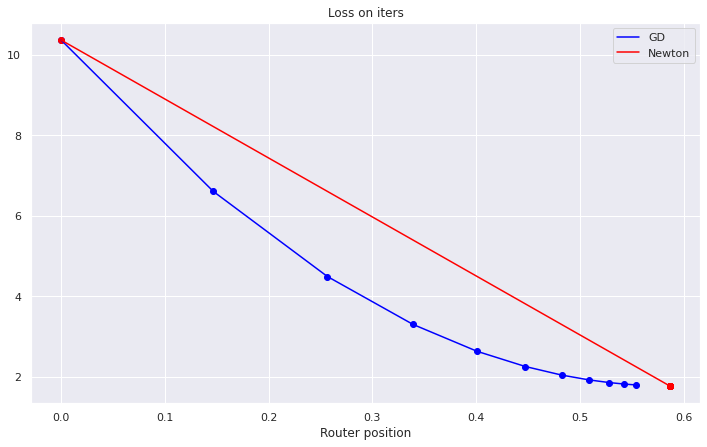

In [0]:
num_steps = 10
w0 = 0

mu = 0.005
ws1 = grad_descent(x, dP, w0, mu, num_steps)
Ps1 = [P(w_i, x) for w_i in ws1]
plt.plot(ws1, Ps1, 'blue', label= 'GD')
plt.scatter(ws1, Ps1, c='blue')

ws2 = newton_descent(x, dP, ddP, w0, num_steps)
Ps2 = [P(w_i, x) for w_i in ws2]
plt.plot(ws2, Ps2, 'red', label= 'Newton')
plt.scatter(ws2, Ps2, c='red')

plt.title('Loss on iters')
plt.xlabel('Router position')
plt.legend()

fig = plt.gcf()
fig.set_size_inches(12, 7)

Как видим на графике, метод Ньютона на втором шаге уже в точке минимума (т.к. функция квадратичная).

Исследуйте поведение метода Ньютона в зависимости от разной стартовой точки $w_0$.

Число шагов из w0 = -4.0 равно  2
Число шагов из w0 = -3.0 равно  1
Число шагов из w0 = -2.0 равно  1
Число шагов из w0 = -1.0 равно  2
Число шагов из w0 = 0.0 равно  1
Число шагов из w0 = 1.0 равно  1
Число шагов из w0 = 2.0 равно  2
Число шагов из w0 = 3.0 равно  1
Число шагов из w0 = 4.0 равно  1
Число шагов из w0 = 5.0 равно  2


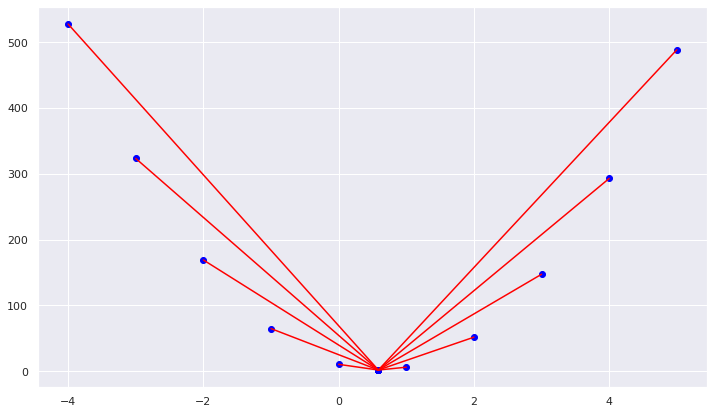

In [0]:
num_steps = 5
w0_values = np.linspace(-4, 5, 10)
mu = 0.005
for w0 in w0_values:    
    ws = newton_descent(x, dP, ddP, w0, num_steps)
    Ps = [P(w_i, x) for w_i in ws]
    plt.plot(ws, Ps, 'red', label= 'Newton')
    plt.scatter(ws, Ps, c='blue')
    fig = plt.gcf()
    fig.set_size_inches(12, 7)
    print('Число шагов из w0 = {} равно '.format(round(w0, 1)), len(set(ws)) - 1 )

Давайте нарисуем оптимальное положение роутера в деревне хоббитцов:

In [0]:
def plot_village_with_internet(coordinates, router_coordinates, l=1):
    # Checking, that all the coordinates are less than l
    assert (np.array(coordinates) <= l).all(), 'All the houses should be in the village'
    assert (np.array(router_coordinates) <= l).all(), 'Router should be in the village'
    
    # Draw horizontal line
    plt.hlines(0, 0, l)
    plt.xlim(0, l)
    plt.ylim(-0.5, 0.5)
    
    # Draw house points
    y = np.zeros(np.shape(coordinates))
    plt.title('Modern Hobbit Village')
    plt.plot(coordinates,y,'o',ms = 10)  
    
    # Draw routers
    y = np.zeros(np.shape(router_coordinates))
    plt.plot(router_coordinates,y,'*',ms = 50)
    plt.axis('off')
    plt.xlabel('Coordinates')
    fig = plt.gcf()
    fig.set_size_inches(15, 1)
    plt.show()

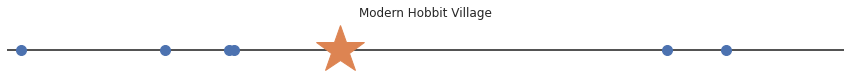

In [0]:
N = 6
l = 1
x1 = np.random.rand(N)*l

# w_ = newton_descent(P, dP, ddP, 0, 2)[-1]
w_ = newton_descent(x1, dP, ddP, 0, 2)[-1]

plot_village_with_internet(x1, w_, l)

### 🤔
Напишите функцию `stochastic_gradient_descent`, которая возвращает всю оптимизационную траекторию $(w_k)$ через фиксированное число шагов по методу стохастического градиентного спуска (градиент считается не по всем домикам деревни хоббитцов, а по случайному подмножеству)

In [0]:
# Stochastic Gradient
def dP_sigma(w, x, p=0.5):
    random_mask = np.random.binomial(1, p, x.shape)
    x_tmp = x[random_mask == 1]
    return dP(w, x_tmp)

def stochastic_gradient_descent(x, dP_sigma, w0, mu, Nsteps):
    trajectory = []
    w_k = w0
    trajectory.append(w_k)
    for _ in range(Nsteps):
        w_k = w_k - mu * dP_sigma(w_k, x)
        trajectory.append(w_k)
    return trajectory

Увеличьте число домиков до $50$, сравните траектории алгоритмов градиентного и стохастического градиентного спуска. Сравните их.

Hint: придется изменить размер шага, чтобы работало:)

In [0]:
N = 50
l = 1
x2 = np.random.rand(N)*l

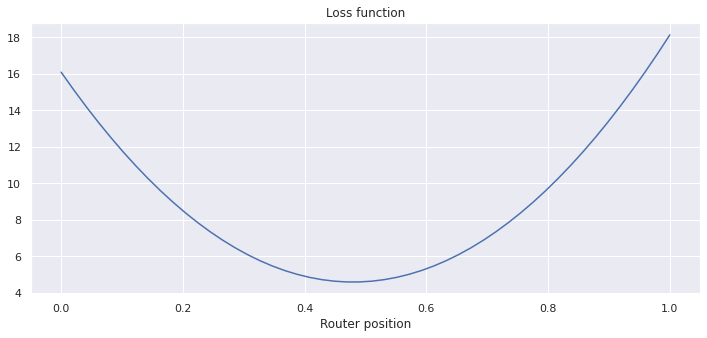

In [0]:
w = np.linspace(0,l)
p = [P(w_i, x2) for w_i in w]
plt.title('Loss function')
plt.xlabel('Router position')
plt.plot(w,p)
fig = plt.gcf()
fig.set_size_inches(12, 5)

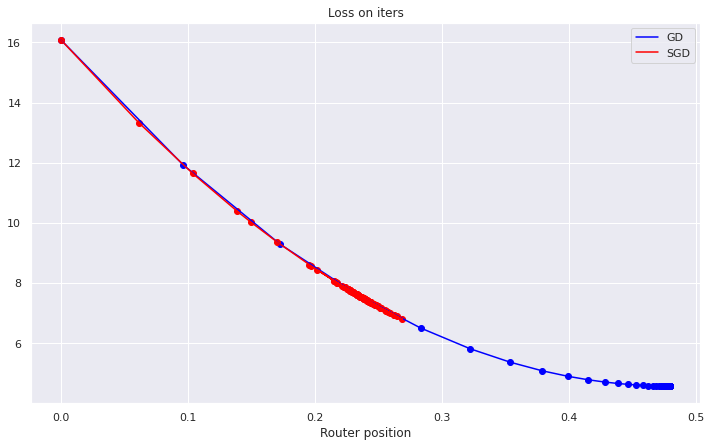

In [0]:
mu = 0.002
num_steps = 100
w0 = 0

ws1 = grad_descent(x2, dP, w0, mu, num_steps)
Ps1 = [P(w_i, x2) for w_i in ws1]
plt.plot(ws1, Ps1, 'blue', label= 'GD')
plt.scatter(ws1, Ps1, c='blue')

ws2 = stochastic_gradient_descent(x2, dP_sigma, w0, mu, num_steps)
Ps2 = [P(w_i, x2) for w_i in ws2]
plt.plot(ws2, Ps2, 'red', label= 'SGD')
plt.scatter(ws2, Ps2, c='red')

plt.title('Loss on iters')
plt.xlabel('Router position')
plt.legend()

fig = plt.gcf()
fig.set_size_inches(12, 7)

Стох градиент не способен дойти до минимума. Надо сэмплить долю точек побольше.

Только-только жизнь обитателей одномерной деревни наладилась, как роскомнадзор (казалось бы, какое ему дело) сказал, что цена на кабель должна считаться совсем по другой формуле: 
$$
p(d) = |d|
$$

### 🤔
Напишите функции `P`, `dP`, `ddP` в новых реалиях. Постройте их для заданного $x$ при различных $w$.

In [0]:
def P(w, x):
    P = 0
    for i in x:
        P += abs(w - i)
    return P

def dP(w, x):
    ones = 0
    minus_ones = 0
    for x_i in x:
        if w < x_i:
            minus_ones += 1
        if w > x_i:
            ones += 1
    dP = ones - minus_ones
    # if dP == 0:
    #     dP = 0.001
    return dP

def ddP(w, x):
    ddP = 0
    return ddP

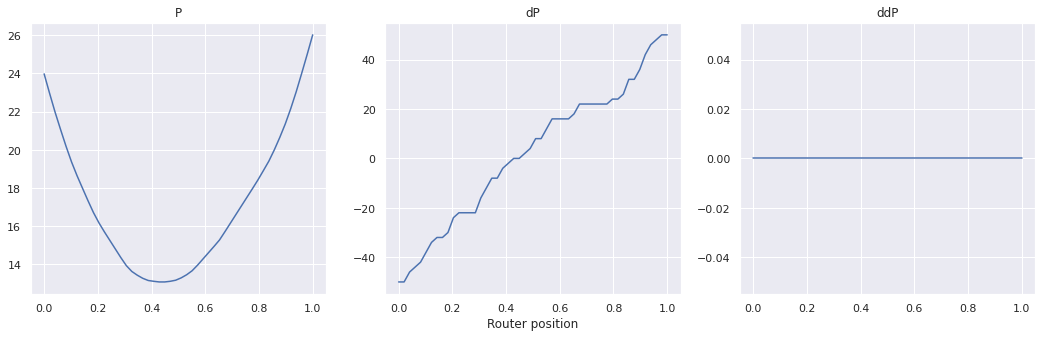

In [0]:
w = np.linspace(0,l)

p = [P(w_i, x2) for w_i in w]
dp = [dP(w_i, x2) for w_i in w]
ddp = [ddP(w_i, x2) for w_i in w]

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey= False)
ax1.plot(w,p)
ax1.set_title('P')
ax2.plot(w,dp)
ax2.set_title('dP')
ax3.plot(w,ddp)
ax3.set_title('ddP')
ax2.set_xlabel('Router position')
f.set_size_inches(18, 5)
# f.suptitle('')
plt.show()

Найдите оптимальное значение $w^*$ в новых реалиях.

Из логических соображений (идеи о том, что мы суммируем расстояния от какой-то точки w до некоторого множества фиксированных точек на оси) получаем, что точка w дожна находиться примерно по середине среди упорядоченных точек. Это понимание получаем из шагания с малеьнким шагом слева направо по оси и наблюдением за суммой расстояний до всех точек от точки w. Ответом является медиана точек, т.е. средняя точка среди нечетного числа N точек или любая точка между двумя средними точками если всего точек четное число N. 

### 🤔
Постройте траекторию градиентного спуска в новых реалиях.

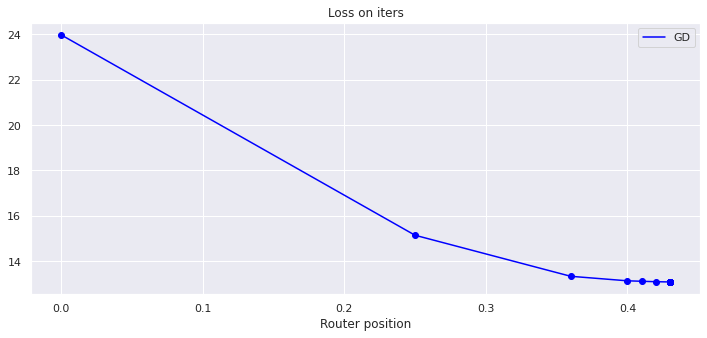

In [0]:
num_steps = 20
w0 = 0

mu = 0.005
ws = grad_descent(x2, dP, w0, mu, num_steps)
Ps = [P(w_i, x2) for w_i in ws]
plt.plot(ws, Ps, 'blue', label= 'GD')
plt.scatter(ws, Ps, c='blue')

plt.title('Loss on iters')
plt.xlabel('Router position')
plt.legend()

fig = plt.gcf()
fig.set_size_inches(12, 5)

 Что Вы скажете роскомнадзору, когда он потребует решать эту задачу методом Ньютона (потому что они где то слышали, что надо использовать лучшие мировые практики)?

Гессиан равен нулю, метод ньютона не применим (в нем нужно делить градиент на гессиан в одномерном случае)

### 🤔
Реализуйте функции `dP_sigma`, `stochastic_gradient_descent` в новых реалиях.

In [0]:
def dP_sigma(w, x, p=0.5):
    random_mask = np.random.binomial(1, p, x.shape)
    x_tmp = x[random_mask == 1]
    return dP(w, x_tmp)

def stochastic_gradient_descent(x, dP_sigma, w0, mu, Nsteps, p= 0.5):
    trajectory = []
    w_k = w0
    trajectory.append(w_k)
    for _ in range(Nsteps):
        w_k = w_k - mu * dP_sigma(w_k, x, p)
        trajectory.append(w_k)
    return trajectory

Постройте траектории градиентного и стохастического градиентного спуска.Поэксперементируйте с уровнем шума в стох. градиенте путем изменения доли домиков, по которым считается градиент ($p$). Проведите эксперименты для большого числа домиков (от $10000$) и сравните результаты.

In [0]:
N = 30000
l = 1
x = np.random.rand(N)*l
mu = 0.5 / N
steps = 20

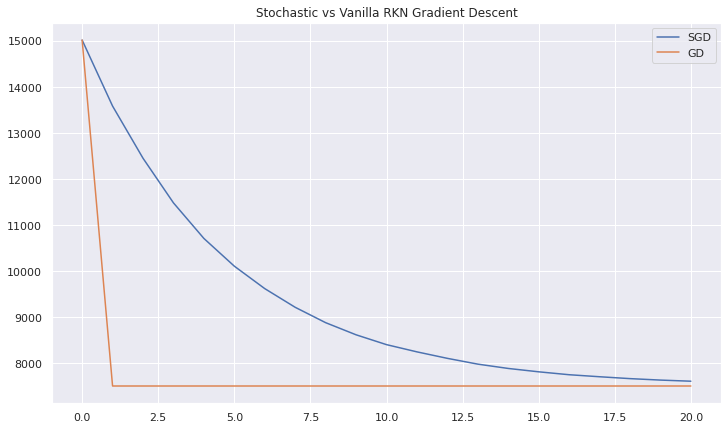

In [0]:
p = 0.1

list_gr = grad_descent(x, dP, 0, mu, steps)
P_gr =[P(w_, x) for w_ in list_gr]

list_sgd = stochastic_gradient_descent(x, dP_sigma, 0, mu, steps, p) 
P_sgd =[P(w_, x) for w_ in list_sgd]

plt.title('Stochastic vs Vanilla RKN Gradient Descent')

plt.plot(P_sgd, label='SGD')
plt.plot(P_gr, label='GD')
plt.legend()
fig = plt.gcf()
fig = plt.gcf()
fig.set_size_inches(12, 7)

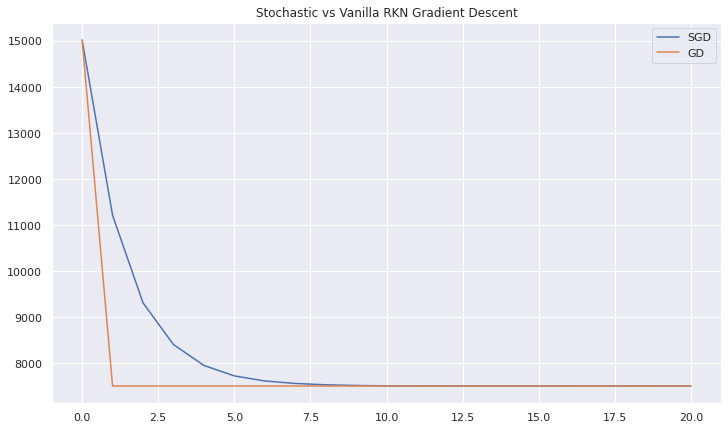

In [0]:
p = 0.3

list_gr = grad_descent(x, dP, 0, mu, steps)
P_gr =[P(w_, x) for w_ in list_gr]

list_sgd = stochastic_gradient_descent(x, dP_sigma, 0, mu, steps, p) 
P_sgd =[P(w_, x) for w_ in list_sgd]

plt.title('Stochastic vs Vanilla RKN Gradient Descent')

plt.plot(P_sgd, label='SGD')
plt.plot(P_gr, label='GD')
plt.legend()
fig = plt.gcf()
fig = plt.gcf()
fig.set_size_inches(12, 7)

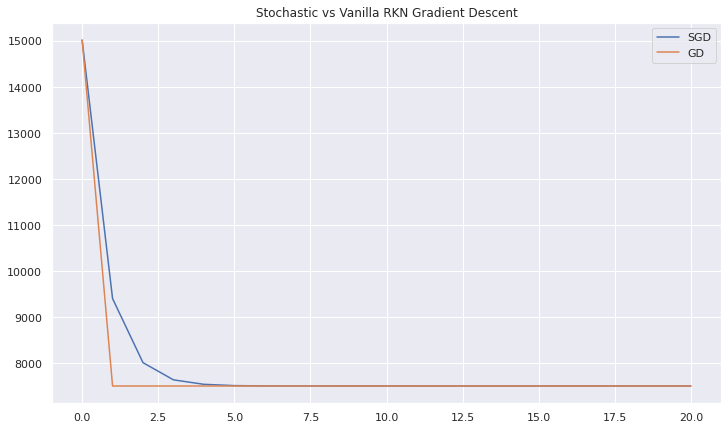

In [0]:
p = 0.5

list_gr = grad_descent(x, dP, 0, mu, steps)
P_gr =[P(w_, x) for w_ in list_gr]

list_sgd = stochastic_gradient_descent(x, dP_sigma, 0, mu, steps) 
P_sgd =[P(w_, x) for w_ in list_sgd]

plt.title('Stochastic vs Vanilla RKN Gradient Descent')

plt.plot(P_sgd, label='SGD')
plt.plot(P_gr, label='GD')
plt.legend()
fig = plt.gcf()
fig = plt.gcf()
fig.set_size_inches(12, 7)

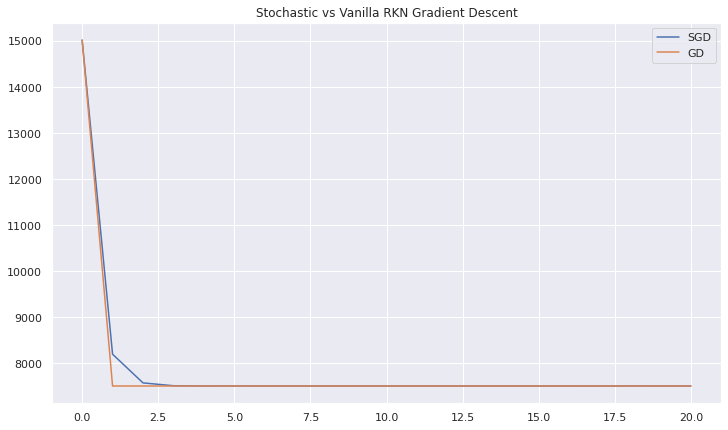

In [0]:
p = 0.7

list_gr = grad_descent(x, dP, 0, mu, steps)
P_gr =[P(w_, x) for w_ in list_gr]

list_sgd = stochastic_gradient_descent(x, dP_sigma, 0, mu, steps, p) 
P_sgd =[P(w_, x) for w_ in list_sgd]

plt.title('Stochastic vs Vanilla RKN Gradient Descent')

plt.plot(P_sgd, label='SGD')
plt.plot(P_gr, label='GD')
plt.legend()
fig = plt.gcf()
fig = plt.gcf()
fig.set_size_inches(12, 7)

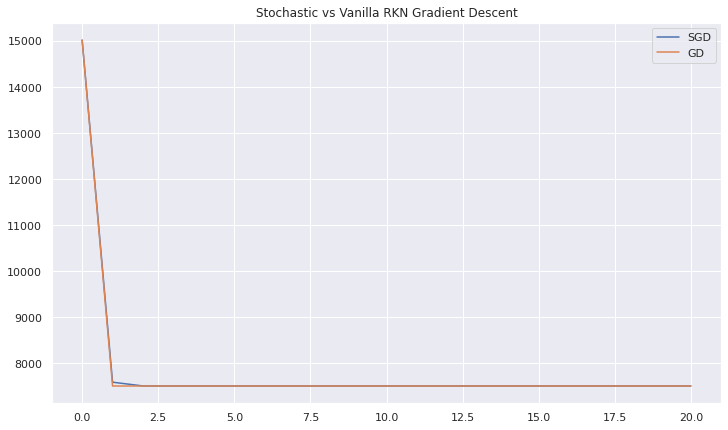

In [0]:
p = 0.9

list_gr = grad_descent(x, dP, 0, mu, steps)
P_gr =[P(w_, x) for w_ in list_gr]

list_sgd = stochastic_gradient_descent(x, dP_sigma, 0, mu, steps, p) 
P_sgd =[P(w_, x) for w_ in list_sgd]

plt.title('Stochastic vs Vanilla RKN Gradient Descent')

plt.plot(P_sgd, label='SGD')
plt.plot(P_gr, label='GD')
plt.legend()
fig = plt.gcf()
fig = plt.gcf()
fig.set_size_inches(12, 7)

Результат довольно очевидный - чем больше доля используемых точек в стох градиенте тем ближе решение к обычному спуску.

Дела шли своим чередом в деревне хоббитцов. Однако, как и всякое процветающее общество (коим без всяких сомнений себя считали хоббитцы), они решили, что их количество увеличилось достаточно для того, чтобы поставить второй датацетр (роутер) и проводить интернет к каждому дому от ближайшего к нему роутера.
$$
P(w_1, w_2, x) = \sum\limits_{i=1}^N p(d_i) = \sum\limits_{i=1}^N p\left(\min\left(\left|w_1 - x_i\right|, \left|w_2 - x_i\right|\right)\right)
$$

### 🤔
Напишите функции `P`, `dP` в новых реалиях. Постройте их для заданного $x$ при различных $w_1, w_2$. Помните, что градиент в этом случае представляет собой двумерный вектор.

In [0]:
def P(w1, w2, x):
    P = 0
    for x_i in x:
        P += min(abs(w1 - x_i), abs(w2 - x_i))
    return P

def dP(w1, w2, x):
    ones_1 = 0
    minus_ones_1 = 0
    ones_2 = 0
    minus_ones_2 = 0
    dP = []
    for x_i in x:
        if abs(w1 - x_i) < abs(w2 - x_i):
            if w1 > x_i:
                ones_1 += 1
            else:
                minus_ones_1 += 1
        else:
            if w2 > x_i:
                ones_2 += 1
            else:
                minus_ones_2 += 1
    dP = [ones_1 - minus_ones_1, ones_2 - minus_ones_2]
    return dP

Постройте графики $P(w_1, w_2), \nabla P(w_1, w_2)$ для различных значений $N$. Прокомментируйте, что происходит по мере увеличения $N$.

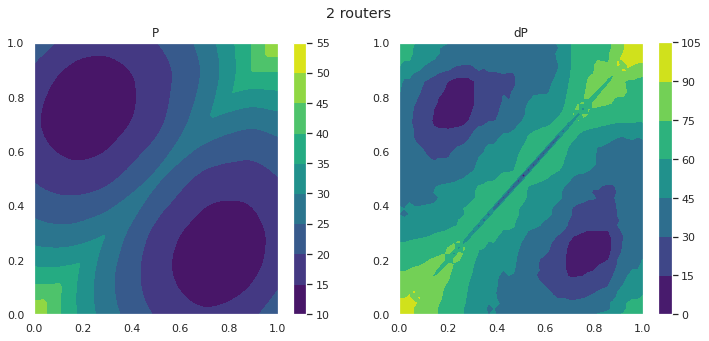

In [0]:
N = 100
l = 1
x = np.random.rand(N)*l

w1 = np.linspace(0,l)
w2 = np.linspace(0,l)

p = np.zeros([w1.shape[0], w2.shape[0]])
dp = np.zeros([w1.shape[0], w2.shape[0]])

i = 0
for w1_ in w1:
    j = 0
    for w2_ in w2:
        p[i][j]  =  P(w1_, w2_, x)
        dp[i][j] = np.linalg.norm(dP(w1_, w2_, x))
        j += 1
    i += 1

f, (ax1, ax2) = plt.subplots(1, 2, sharey= False)
c1 = ax1.contourf(w1, w2, p, cmap="viridis")
plt.colorbar(c1, ax = ax1)
ax1.set_title('P')
c2 = ax2.contourf(w1, w2, dp, cmap="viridis")
plt.colorbar(c2, ax = ax2)
ax2.set_title('dP')

f.set_size_inches(12, 5)
f.suptitle('2 routers')
plt.show()

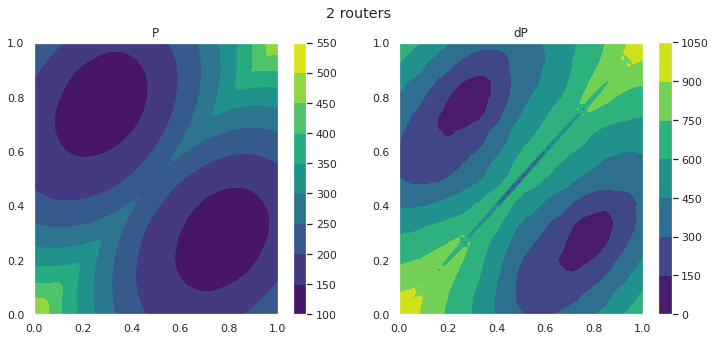

In [0]:
N = 1000
l = 1
x = np.random.rand(N)*l

w1 = np.linspace(0,l)
w2 = np.linspace(0,l)

p = np.zeros([w1.shape[0], w2.shape[0]])
dp = np.zeros([w1.shape[0], w2.shape[0]])

i = 0
for w1_ in w1:
    j = 0
    for w2_ in w2:
        p[i][j]  =  P(w1_, w2_, x)
        dp[i][j] = np.linalg.norm(dP(w1_, w2_, x))
        j += 1
    i += 1

f, (ax1, ax2) = plt.subplots(1, 2, sharey= False)
c1 = ax1.contourf(w1, w2, p, cmap="viridis")
plt.colorbar(c1, ax = ax1)
ax1.set_title('P')
c2 = ax2.contourf(w1, w2, dp, cmap="viridis")
plt.colorbar(c2, ax = ax2)
ax2.set_title('dP')

f.set_size_inches(12, 5)
f.suptitle('2 routers')
plt.show()

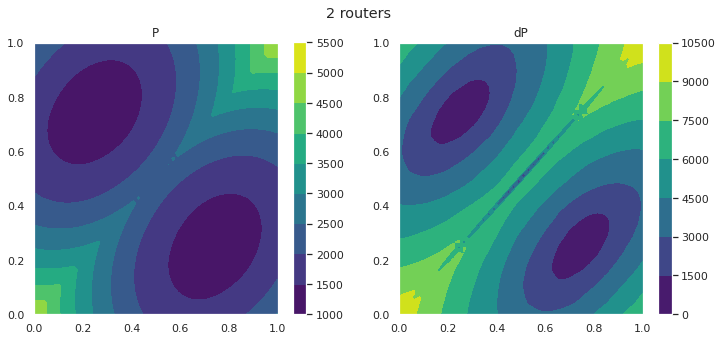

In [0]:
N = 10000
l = 1
x = np.random.rand(N)*l

w1 = np.linspace(0,l)
w2 = np.linspace(0,l)

p = np.zeros([w1.shape[0], w2.shape[0]])
dp = np.zeros([w1.shape[0], w2.shape[0]])

i = 0
for w1_ in w1:
    j = 0
    for w2_ in w2:
        p[i][j]  =  P(w1_, w2_, x)
        dp[i][j] = np.linalg.norm(dP(w1_, w2_, x))
        j += 1
    i += 1

f, (ax1, ax2) = plt.subplots(1, 2, sharey= False)
c1 = ax1.contourf(w1, w2, p, cmap="viridis")
plt.colorbar(c1, ax = ax1)
ax1.set_title('P')
c2 = ax2.contourf(w1, w2, dp, cmap="viridis")
plt.colorbar(c2, ax = ax2)
ax2.set_title('dP')

f.set_size_inches(12, 5)
f.suptitle('2 routers')
plt.show()

С увеличением числа точек функция и ее градиент сглаживаются все сильнее, т.к. отрезки на оси х между домами все меньше.


### 🤔
Напишите функцию `gradient_descent`, которая возвращает всю оптимизационную траекторию $(w_k)$ через фиксированное число шагов и рисует процесс на графиках $P$ и $\nabla P$, что были выше (анимацию).

In [0]:
import numpy as np

def gradient_descent_(P, dP, w0, mu, Nsteps):
    steps = []
    w_k = np.array(w0)
    steps.append(w_k)
    for _ in range(Nsteps):
        grad = np.array( dP(w_k[0], w_k[1], x) )
        w_k = w_k - mu * grad 
        steps.append(w_k)

    w1 = np.linspace(0,l)
    w2 = np.linspace(0,l)
    p = np.zeros([w1.shape[0], w2.shape[0]])
    dp = np.zeros([w1.shape[0], w2.shape[0]])
    i = 0
    for w1_ in w1:
        j = 0
        for w2_ in w2:
            p[i][j]  =  P(w1_, w2_, x)
            dp[i][j] = np.linalg.norm(dP(w1_, w2_, x))
            j += 1
        i += 1
    f, (ax1, ax2) = plt.subplots(1, 2, sharey= False)

    c1 = ax1.contourf(w1, w2, p, cmap="viridis")
    plt.colorbar(c1, ax = ax1)
    ax1.set_title('P')
    c2 = ax2.contourf(w1, w2, dp, cmap="viridis")
    plt.colorbar(c2, ax = ax2)
    ax2.set_title('dP')

    w1 = []
    w2 = []
    for point in steps:
        w1.append(point[0])
        w2.append(point[1])

    ax1.scatter(w1, w2, c='red')
    ax2.scatter(w1, w2, c='red')
    
    f.set_size_inches(12, 5)
    f.suptitle('2 routers')
    plt.show()
    return steps

In [0]:
# Запустим все следующие методы на одной деревне
N = 1000
l = 1
x = np.random.rand(N)*l

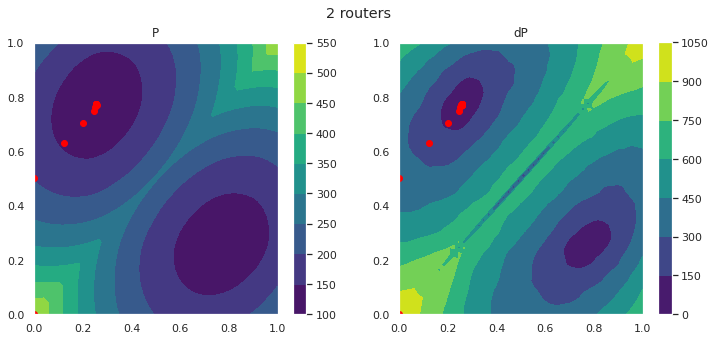

In [0]:
mu = 0.5 / N 
iters = gradient_descent_(P, dP, [0,0], mu, 20)

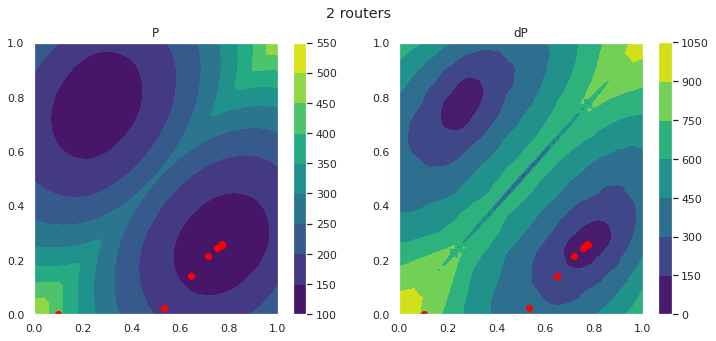

In [0]:
mu = 0.5 / N 
iters = gradient_descent_(P, dP, [0.1,0], mu, 20)

### 🤔
Напишите функцию `stochastic_gradient_descent`, которая возвращает всю оптимизационную траекторию $(w_k)$ метода стохастического градиентного спуска через фиксированное число шагов и рисует процесс на графиках $P$ и $\nabla P$, что были выше (анимацию).

In [0]:
def dP_sigma_(w1, w2, x, p=0.5):
    random_mask = np.random.binomial(1, p, x.shape)
    x_tmp = x[random_mask == 1]
    return dP(w1, w2, x_tmp)

def stochastic_gradient_descent_(P, dP_sigma, w0, mu, Nsteps):
    steps = []
    w_k = np.array(w0)
    steps.append(w_k)
    for _ in range(Nsteps):
        grad = np.array( dP_sigma(w_k[0], w_k[1], x) )
        w_k = w_k - mu * grad 
        steps.append(w_k)

    w1 = np.linspace(0,l)
    w2 = np.linspace(0,l)
    p = np.zeros([w1.shape[0], w2.shape[0]])
    dp = np.zeros([w1.shape[0], w2.shape[0]])
    i = 0
    for w1_ in w1:
        j = 0
        for w2_ in w2:
            p[i][j]  =  P(w1_, w2_, x)
            dp[i][j] = np.linalg.norm(dP(w1_, w2_, x))
            j += 1
        i += 1
    f, (ax1, ax2) = plt.subplots(1, 2, sharey= False)

    c1 = ax1.contourf(w1, w2, p, cmap="viridis")
    plt.colorbar(c1, ax = ax1)
    ax1.set_title('P')
    c2 = ax2.contourf(w1, w2, dp, cmap="viridis")
    plt.colorbar(c2, ax = ax2)
    ax2.set_title('dP')

    w1 = []
    w2 = []
    for point in steps:
        w1.append(point[0])
        w2.append(point[1])

    ax1.scatter(w1, w2, c='red')
    ax2.scatter(w1, w2, c='red')
    
    f.set_size_inches(12, 5)
    f.suptitle('2 routers')
    plt.show()
    return steps

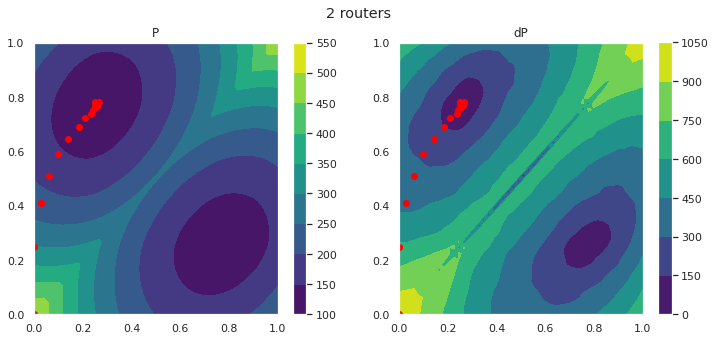

In [0]:
mu = 0.5 / N 
iters = stochastic_gradient_descent_(P, dP_sigma_, [0,0], mu, 20)

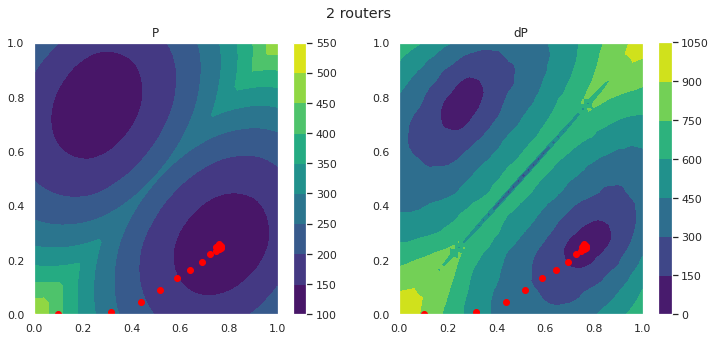

In [0]:
mu = 0.5 / N 
iters = stochastic_gradient_descent_(P, dP_sigma_, [0.1,0], mu, 20)

### 🤔
На практике Вам не так часто нужно будет писать свой собстенный алгоритм оптимизации. Решите поставленную выше задачу (2 станции, роскомнадзоровская норма) любым алгоритмом оптимизации из любой библиотеки Python. (cvxpy, scipy и т.д.)
Нарисуйте такие же анимашки.

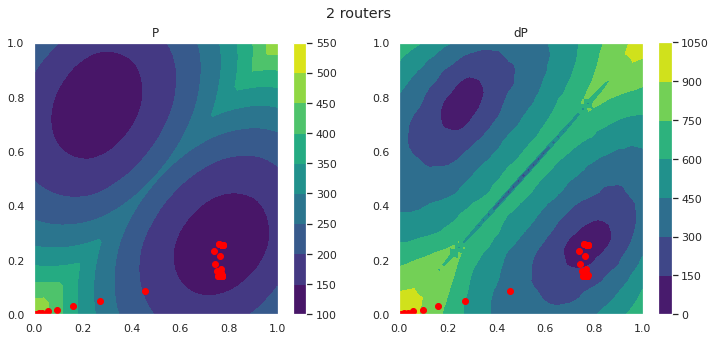

In [0]:
from scipy.optimize import minimize

def F(w):
    return P(w[0], w[1], x)

def get_step(xk):
    steps.append(xk)



w0 = [0, 0]

steps = []
steps.append(w0)
info = minimize(fun= F, x0= w0, method= 'Nelder-Mead', callback= get_step) 

w1 = np.linspace(0,l)
w2 = np.linspace(0,l)
p = np.zeros([w1.shape[0], w2.shape[0]])
dp = np.zeros([w1.shape[0], w2.shape[0]])

i = 0
for w1_ in w1:
    j = 0
    for w2_ in w2:
        p[i][j]  =  P(w1_, w2_, x)
        dp[i][j] = np.linalg.norm(dP(w1_, w2_, x))
        j += 1
    i += 1

f, (ax1, ax2) = plt.subplots(1, 2, sharey= False)
c1 = ax1.contourf(w1, w2, p, cmap="viridis")
plt.colorbar(c1, ax = ax1)
ax1.set_title('P')
c2 = ax2.contourf(w1, w2, dp, cmap="viridis")
plt.colorbar(c2, ax = ax2)
ax2.set_title('dP')

w1 = [point[0] for point in steps]
w2 = [point[1] for point in steps]

ax1.scatter(w1, w2, c='red')
ax2.scatter(w1, w2, c='red')

f.set_size_inches(12, 5)
f.suptitle('2 routers')
plt.show()

Одномерная деревня научилась решать свои проблемы при любом числе и раположении жителей в мгновение ока. Улучшив качество интернета, хоббитцы смотрели онлайн-курсы и мемесы и жили припеваючи. Как Вы могли догадаться, роскомнадзору это не очень по душе. Вот тут то они выкатили новое требование о том, что дата-центры (роутеры) должны стоять не более, чем на расстоянии половины деревни друг от друга, чтобы силовым структурам было легче собирать информацию о том, как используют интернет жители деревни Одномерново.

$$
\left|w_1 - w_2\right| \leq \dfrac{l}{2}
$$

### 🤔
Нарисуйте на плоскости допустимое множество решений. Выпукло ли оно?

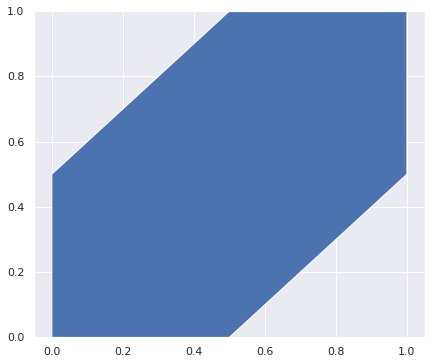

In [0]:
l = 1

x = np.linspace(0,l)
y1 = [0.5 + i for i in x]
y2 = [-0.5 + i for i in x]
plt.fill_between(x, y1, y2)
fig = plt.gcf()
plt.ylim(0,1)
fig.set_size_inches(7, 6)

Допустимое множество выпукло.

### 🤔
Напишите функцию `conditional_SGD`, которая возвращает всю оптимизационную траекторию $(w_k)$ метода условного стохастического градиентного спуска через фиксированное число шагов и рисует процесс на графиках $P$ и $\nabla P$, что были выше (анимацию).

Метод условного градиентного спуска заключается в том, чтобы делать градиентный шаг, а после этого проверять принадлежность полученной точки целевому множеству. Если она ему принадлежит, то алгоритм продолжается, иначе делается ортогональная проекция на целевое множество.

In [0]:
def dP_sigma_(w1, w2, x, p=0.5):
    random_mask = np.random.binomial(1, p, x.shape)
    x_tmp = x[random_mask == 1]
    return dP(w1, w2, x_tmp)

def conditional_SGD(P, dP_sigma, w0, mu, Nsteps):
    steps = []
    w_k = np.array(w0)

    if abs(w_k[0] - w_k[1]) > 0.5 * l:
        # print('Fuck')
        if w_k[1] > 0.5 * l:
            w_k[1] = 0.5 * (w_k[1] + w_k[0] + 0.5)
            w_k[0] = w_k[1] - 0.5
        else:
            w_k[1] = 0.5 * (w_k[1] + w_k[0] - 0.5)
            w_k[0] = w_k[1] + 0.5

    steps.append(w_k)
    for _ in range(Nsteps):
        grad = np.array( dP_sigma(w_k[0], w_k[1], x) )
        w_k = w_k - mu * grad 

        if abs(w_k[0] - w_k[1]) > 0.5 * l:
            # print('Fuck')
            if w_k[1] > 0.5 * l:
                w_k[1] = 0.5 * (w_k[1] + w_k[0] + 0.5)
                w_k[0] = w_k[1] - 0.5
            else:
                w_k[1] = 0.5 * (w_k[1] + w_k[0] - 0.5)
                w_k[0] = w_k[1] + 0.5

        steps.append(w_k)

    w1 = np.linspace(0,l)
    w2 = np.linspace(0,l)
    p = np.zeros([w1.shape[0], w2.shape[0]])
    dp = np.zeros([w1.shape[0], w2.shape[0]])
    i = 0
    for w1_ in w1:
        j = 0
        for w2_ in w2:
            p[i][j]  =  P(w1_, w2_, x)
            dp[i][j] = np.linalg.norm(dP(w1_, w2_, x))
            j += 1
        i += 1
    f, (ax1, ax2) = plt.subplots(1, 2, sharey= False)

    c1 = ax1.contourf(w1, w2, p, cmap="viridis")
    plt.colorbar(c1, ax = ax1)
    ax1.set_title('P')
    c2 = ax2.contourf(w1, w2, dp, cmap="viridis")
    plt.colorbar(c2, ax = ax2)
    ax2.set_title('dP')

    w1 = []
    w2 = []
    for point in steps:
        w1.append(point[0])
        w2.append(point[1])

    ax1.scatter(w1, w2, c='red')
    ax2.scatter(w1, w2, c='red')
    
    f.set_size_inches(12, 5)
    f.suptitle('2 routers')
    plt.show()
    return steps

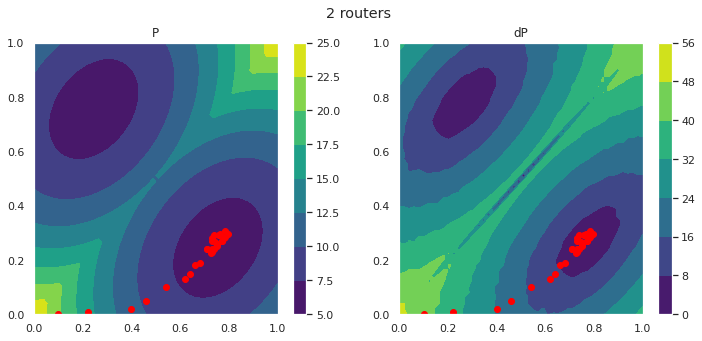

In [0]:
iters = conditional_SGD(P, dP_sigma_, [0.1, 0], 10 / N, 30)

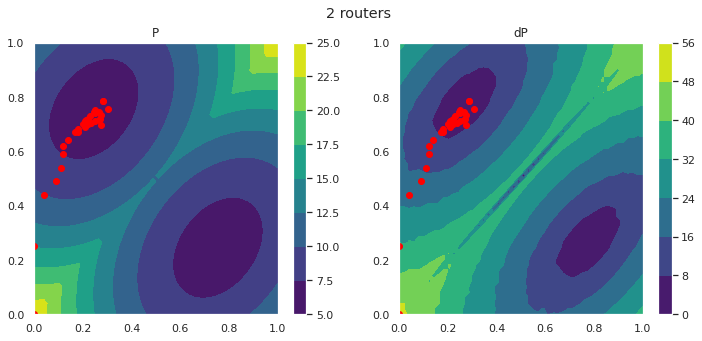

In [0]:
iters = conditional_SGD(P, dP_sigma_, [0, 0], 10 / N, 30)

### 🤔
Напишите функцию `multi_newton`, которая реализует решение двумерной задачи с $p(d) = d^3$ методом Ньютона и возвращает траекторию работы алгоритма. Сравните результаты для данной задачи с методом стохастического градиентного спуска.

$$
P(w_1, w_2, x) = \sum\limits_{i=1}^N p(d_i) = \sum\limits_{i=1}^N \left(\min\left(\left|w_1 - x_i\right|, \left|w_2 - x_i\right|\right)\right)^3
$$

In [0]:
def P_3(w1, w2, x):
    P = 0
    for x_i in x:
        P += ( min( abs(w1 - x_i), abs(w2 - x_i) ) )**3
    return P

def dP_3(w1, w2, x):
    ones_1 = 0
    minus_ones_1 = 0
    ones_2 = 0
    minus_ones_2 = 0
    dP = []
    for x_i in x:
        if abs(w1 - x_i) < abs(w2 - x_i):
            if w1 > x_i:
                ones_1 += 1
            else:
                minus_ones_1 += 1
        else:
            if w2 > x_i:
                ones_2 += 1
            else:
                minus_ones_2 += 1
    dP = np.array([ones_1 - minus_ones_1, ones_2 - minus_ones_2]) * 3 * ( min( abs(w1 - x_i), abs(w2 - x_i) ) )**2
    return dP

def ddP_3(w1, w2, x):
    ddP11 = 0
    ddP12 = 0 
    ddP21 = 0
    for x_i in x:
        ddP11 += 6 * min( abs(w1 - x_i), abs(w2 - x_i) )
    ddP22 = ddP11
    ddP = [ [ddP11, ddP12], [ddP21, ddP22] ]
    return ddP

def multi_newton(P, dP, ddP, w0, Nsteps):
    w = w0
    steps = []
    for _ in range(Nsteps):
        steps.append(w)
        hess = ddP(w[0], w[1], x)
        grad = dP(w[0], w[1], x)
        h = np.linalg.solve(hess, (-1) * grad)
        w = w + h
    steps.append(w)
    return steps

def dP_sigma_3(w1, w2, x, p=0.5):
    random_mask = np.random.binomial(1, p, x.shape)
    x_tmp = x[random_mask == 1]
    return dP_3(w1, w2, x_tmp)
    
def stochastic_gradient_descent_3(P, dP_sigma, w0, mu, Nsteps):
    steps = []
    w_k = np.array(w0)
    steps.append(w_k)
    for _ in range(Nsteps):
        grad = np.array( dP_sigma(w_k[0], w_k[1], x) )
        w_k = w_k - mu * grad 
        steps.append(w_k)
    return steps

In [0]:
iters_Newton = multi_newton(P_3, dP_3, ddP_3, [0, 0], 30)
iters_SGD = stochastic_gradient_descent_3(P_3, dP_sigma_3, [0, 0], 0.5 / N, 30)

Сравнение двух методов.

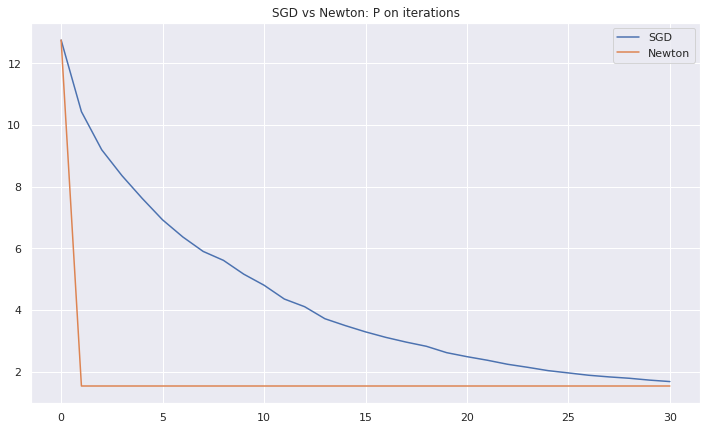

In [0]:
P_Newton =[P_3(w_[0],w_[1], x) for w_ in iters_Newton]
P_SGD =[P_3(w_[0],w_[1], x) for w_ in iters_SGD]

plt.title('SGD vs Newton: P on iterations')
plt.plot(P_SGD, label='SGD')
plt.plot(P_Newton, label='Newton')
plt.legend()
fig = plt.gcf()
fig = plt.gcf()
fig.set_size_inches(12, 7)

## Problem 2. Adaptive metrics methods

В этом задании Вам предлагается погрузиться в специфику тестирования алгоритмов оптимизации на одинаковых классах задач на примере методов адаптивной метрики (Newton, Quasi Newton)

Приведем стандартные обозначения.

### Афинная инвариантность

#### Метод Ньютона:

$$
x_{k+1} = x_k - \left[ f_{xx}(x_k)\right]^{-1}\nabla f(x_k) = x_k - \left[ H(x_k)\right]^{-1}\nabla f(x_k) = x_k - B(x_k)\nabla f(x_k)
$$

#### SR-1 (symmetric rank one) update
Для квазиньютоновского метода использует следующую формулу для уточнения **обратного** гессиана:

$$
B_{k+1} = B_k + \dfrac{(\Delta x_k - B_k \Delta y_k)(\Delta x_k - B_k \Delta y_k)^\top}{\langle \Delta x_k - B_k \Delta y_k , \Delta y_k\rangle},  \quad \Delta y_k = \nabla f(x_{k+1}) - \nabla f(x_k), \quad \Delta x_k = x_{k+1} - x_k
$$

$$
x_{k+1} = x_k - B_k \nabla f (x_k)
$$

Оценка гессиана при этом:

$$
H_{k+1}=H_{k}+\frac {(\Delta y_k-H_k \Delta x_k) (\Delta y_k-H_k \Delta x_k)^\top}{(\Delta y_k-H_k \Delta x_k)^\top \Delta x_k}
$$

#### BFGS
использует следующую формулу для уточнения **обратного** гессиана:

$$
B_{k+1} = B_k + \frac{(\Delta x_k^{\top}\Delta y_k+\Delta y_k^{\top}  B_k \Delta y_k)(\Delta x_k \Delta x_k^{\top})}{(\Delta x_k^{\top} \Delta y_k)^2} - \frac{ B_k \Delta y_k \Delta x_k^{\top} + \Delta x_k \Delta y_k^{\top} B_k}{\Delta x_k^{\top} \Delta y_k}.
$$

Оценка гессиана при этом:

$$
H_{k+1} = H_k + \frac{\Delta y_k \Delta y_k^{\top}}{\Delta y_k^{\top} \Delta x_k} - \frac{H_k \Delta x_k \Delta x_k^{\top} H_k^{\top} }{\Delta x_k^{\top} H_k \Delta x_k}
$$

1-2) Докажите, что для метода Ньютона обладает афинной инвариантностью, т.е. если есть преобразование координат $\tilde{f}(z) = f(x)$, где $x = Sz + s, \;\; s \in \mathbb{R}^n, S \in \mathbb{R}^{n \times n}$, то будет выполняться:

$$
\nabla \tilde{f}(z) = S^\top \nabla f(x), \qquad \nabla^2 \tilde{f}(z) = S^\top \nabla^2 f(x) S
$$

Покажите так же, что метод Ньютона и описанные выше оба квазиньютоновских метода запущенные независимо по координатам $x$ и $z$ будут работать так, что всегда будет выполняться связь $x_k = Sz_k + s$, если $x_0 = Sz_0 + s$ и инициализацией $H_0$ для метода по координате $x$ и $S^\top H_0 S$ для координаты $z$

1) $$ d\tilde{f}(z)=df(x)\Rightarrow <\nabla \tilde{f}(z), dz> = <\nabla f(x), dx> \Rightarrow <\nabla \tilde{f}(z), dz> = <\nabla f(x), Sdz> \Rightarrow <\nabla \tilde{f}(z), dz> = <S^T\nabla f(x), dz> \Rightarrow \nabla \tilde{f}(z)= S^T\nabla f(x)$$

2) $$ d^2\tilde{f}(z)=d^2f(x)\Rightarrow <\nabla^2 \tilde{f}(z)dz_1, dz_2> = <\nabla^2 f(x)dx_1, dx_2> \Rightarrow <\nabla^2 \tilde{f}(z)dz_1, dz_2> = <\nabla^2 f(x)Sdz_1, Sdz_2> \Rightarrow <\nabla^2 \tilde{f}(z)dz_1, dz_2> = <S^T\nabla f(x)S dz_1, dz_2> \Rightarrow \nabla^2 \tilde{f}(z)= S^T\nabla f(x)S$$

### Newton convergence issue
Рассмотрите следующую функцию:

$$
f(x) = \dfrac{x^4}{4} - x^2 + 2x + (y-1)^2
$$

И точку старта $x_0 = (0,2)^\top$. Как ведет себя метод Ньютона, запущенный с этой точки? Чем это можно объяснить? 

Как ведет себя градиентный спуск с фикисрованным шагом $\alpha = 0.01$ и метод наискорейшего спуска в таких же условиях?
(в этом задании не обязательно показывать численные симуляции)

1) Метод Ньютона вечно ходит по трем точкам включая первую по кругу

$$ x_0 = (0, 2); x_1 = (1, 1); x_2 = (1, 0); x_3 = x_0 $$

Это так наверное потому что при повторении следущих шагов: приблизить график функции параболоидом и пойти в его точки минимума- именно для этой функции (ее сечение горизонтальной плоскостью похоже на треугольник) получается зациклится.

### Сравнение методов

Реализуйте на языке python:
* метод Ньютона
* метод SR-1

для минимизации следующих функций:
* Квадратичная форма $f(x) = \dfrac{1}{2}x^\top A x + b^\top x, \quad x \in \mathbb{R}^n, A \in \mathbb{S}_+^{n \times n}$. Попробуйте n = 2, 50, 228
* Функция Розенброка $f(x, y) = (1-x)^2 + 100(y-x^2)^2 .\quad$

Сравните 2 реализованных Вами метода И [метод](https://docs.s
cipy.org/doc/scipy/reference/optimize.minimize-bfgs.html) `BFGS` из библиотеки `scipy`, а так же его модификацию [L-BFGS](https://docs.scipy.org/doc/scipy/reference/optimize.minimize-lbfgsb.html) в решении задачи минимизации описанных выше функций. точку старта необходимо инициализировать одинаковую для всех методов в рамках одного запуска. Необходимо провести не менее 10 запусков для каждого метода на каждой функции до достижения того критерия остановки, который вы выберете (например, расстояние до точки оптимума - во всех задачах мы её знаем)

В качестве результата нужно заполнить следующие таблички, заполнив в них усредненное по числу запусков количество итераций, необходимых для сходимости и времени работы:

Критерий остановки `____ftol < 2 * 1e-10____`

Число запусков для усреднения `___10____`

P.S. если в силу каких то причин Вам не удалось сделать задание полностью, попробуйте сфокусироваться хотя бы на его части.

| Квадратичная форма. n = 2 | Iterations | Time |
|:-------------------------:|:----------:|:----:|
|           Newton          |            |      |
|            SR-1           |            |      |
|            BFGS           |            |      |
|           L-BFGS          |            |      |

| Квадратичная форма. n = 50 | Iterations | Time |
|:-------------------------:|:----------:|:----:|
|           Newton          |            |      |
|            SR-1           |            |      |
|            BFGS           |            |      |
|           L-BFGS          |            |      |


| Квадратичная форма. n = 228 | Iterations | Time |
|:-------------------------:|:----------:|:----:|
|           Newton          |            |      |
|            SR-1           |            |      |
|            BFGS           |            |      |
|           L-BFGS          |            |      |

| Функция Розенброка | Iterations | Time |
|:-------------------------:|:----------:|:----:|
|           Newton          |            |      |
|            SR-1           |            |      |
|            BFGS           |            |      |
|           L-BFGS          |            |      |

#Эта таблица ниже заполнена

In [0]:
from  sklearn.datasets import make_spd_matrix
import time
from scipy.optimize import minimize

num_iters = 200

def f1(x):
    return 0.5 * x @ (A @ x) + b @ x

def df1(x):
    return A @ x + b

def ddf1(x):
    return A

def Newton_meth(P, dP, ddP, x0, f_tol, Nsteps=num_iters):
    start = time.time()
    x = x0
    steps = []
    for _ in range(Nsteps):
        steps.append(x)
        hess = ddP(x)
        grad = dP(x)
        h = np.linalg.solve(hess, (-1) * grad)
        x = x + h

        fk_1 = P(x-h)
        fk = P(x)
        if abs(fk - fk_1) / max(1, abs(fk), abs(fk_1) ) < f_tol:
            break
    steps.append(x)
    end = time.time()
    return steps, end - start

iters_BFGS = []
def stack_point(x):
    iters_BFGS.append(x)

def BFGS(P, dP, x0, f_tol, Nsteps=num_iters):
    start = time.time()
    result = minimize(fun= P, x0= x0, method='BFGS', jac= dP, tol= f_tol, callback= stack_point, options={'maxiter': Nsteps})
    end = time.time()
    return end - start

iters_LBFGS = []
def stack(x):
    iters_LBFGS.append(x)

def LBFGS(P, dP, x0, f_tol, Nsteps=num_iters):
    start = time.time()
    result =  minimize(fun= P, x0= x0, method='L-BFGS-B', jac= dP, tol= f_tol, callback= stack, options={'maxiter': Nsteps})
    end = time.time()
    return end - start


def SR_1_Newton(P, dP, ddP, x0, f_tol, Nsteps=num_iters):
    start = time.time()
    traj = []
    x_prev = x0
    B_prev = np.linalg.inv(ddP(x0))
    traj.append(x_prev)
    for _ in range(Nsteps):
        grad_prev = dP(x_prev)
        x_next = x_prev - B_prev @ grad_prev
        traj.append(x_next)
        
        fk_1 = P(x_prev)
        fk = P(x_next)
        if abs(fk - fk_1) / max(1, abs(fk), abs(fk_1) ) < f_tol:
            break

        delta_x = x_next - x_prev
        delta_grad = dP(x_next) - grad_prev
        tmp_vec = delta_x - B_prev @ delta_grad
        tmp_mat = np.outer(tmp_vec, tmp_vec)
        check_this_for_nonzero = tmp_vec @  delta_grad
        if check_this_for_nonzero == 0:
            break
        B_next = B_prev + tmp_mat / check_this_for_nonzero
        B_prev = B_next
        x_prev = x_next
    end = time.time()
    return traj, end - start


В такой постановке буду получать результаты для первой функции

In [0]:
rounds_for_avereaging = 10
func_tolerance = 2 * 1e-10

for n_dim in [2, 50, 228]:
    Newton_aver_num_iters = 0
    SR_aver_num_iters = 0
    BFGS_aver_num_iters = 0
    LBFGS_aver_num_iters = 0

    aver_time_newton = 0
    aver_time_sr = 0
    aver_time_bfgs = 0
    aver_time_lbfgs = 0

    for _ in range(rounds_for_avereaging):
        A = make_spd_matrix(n_dim)
        b = np.random.rand(n_dim)
        x0 = np.random.rand(n_dim)

        iters_New, time_New = Newton_meth(f1, df1, ddf1, x0, func_tolerance)
        iters_SR, time_SR = SR_1_Newton(f1, df1, ddf1, x0, func_tolerance)
        iters_BFGS = [x0]
        time_BFGS = BFGS(f1, df1, x0, func_tolerance)
        iters_LBFGS = [x0]
        time_LBFGS = LBFGS(f1, df1, x0, func_tolerance)

        Newton_aver_num_iters += len(iters_New) 
        SR_aver_num_iters += len(iters_SR)
        BFGS_aver_num_iters += len(iters_BFGS)
        LBFGS_aver_num_iters += len(iters_LBFGS)

        aver_time_newton += time_New
        aver_time_sr += time_SR
        aver_time_bfgs += time_BFGS
        aver_time_lbfgs += time_LBFGS
    
    aver_time_newton /= rounds_for_avereaging
    aver_time_sr /= rounds_for_avereaging
    aver_time_bfgs /= rounds_for_avereaging
    aver_time_lbfgs /= rounds_for_avereaging

    Newton_aver_num_iters /= rounds_for_avereaging
    SR_aver_num_iters /= rounds_for_avereaging
    BFGS_aver_num_iters /= rounds_for_avereaging
    LBFGS_aver_num_iters /= rounds_for_avereaging

    print("Data for {} dimensions".format(n_dim))
    print("Newton: mean time = {}, mean number of steps = {}".format(aver_time_newton, Newton_aver_num_iters))
    print("SR-1: mean time = {}, mean number of steps = {}".format(aver_time_sr, SR_aver_num_iters))
    print("BFGS: mean time = {}, mean number of steps = {}".format(aver_time_bfgs, BFGS_aver_num_iters))
    print("LBFGS: mean time = {}, mean number of steps = {}".format(aver_time_lbfgs, LBFGS_aver_num_iters))
    print('\n')



# Plottinf all 4 methods

# f_New = [f1(x) for x in iters_New]
# f_SR = [f1(x) for x in iters_SR]
# f_BFGS = [f1(x) for x in iters_BFGS]
# f_LBFGS = [f1(x) for x in iters_LBFGS]

# plt.title('Compare methods for quadratic function; n_dim = {},'.format(n_dim))

# plt.plot(f1_BFGS, c='red', label='BFGS')
# plt.scatter(range(len(f1_BFGS)), f1_BFGS, c='red')

# plt.plot(f1_LBFGS, c='blue', label='LBFGS')
# plt.scatter(range(len(f1_LBFGS)), f1_LBFGS, c='blue')

# plt.plot(f1_New, c='green', label='Newton')
# plt.scatter(range(len(f1_New)), f1_New, c='green')

# plt.plot(f1_SR, c='black', label='Newton SR-1')
# plt.scatter(range(len(f1_SR)), f1_SR, c='black')

# plt.legend()
# fig = plt.gcf()
# fig.set_size_inches(12, 7)

Data for 2 dimensions
Newton: mean time = 0.00015778541564941405, mean number of steps = 3.0
SR-1: mean time = 0.00013811588287353515, mean number of steps = 3.0
BFGS: mean time = 0.0014989852905273437, mean number of steps = 9.7
LBFGS: mean time = 0.0005508899688720703, mean number of steps = 8.9


Data for 50 dimensions
Newton: mean time = 0.0003485679626464844, mean number of steps = 3.0
SR-1: mean time = 0.0002831459045410156, mean number of steps = 3.0
BFGS: mean time = 0.014615058898925781, mean number of steps = 52.0
LBFGS: mean time = 0.00392906665802002, mean number of steps = 61.8


Data for 228 dimensions
Newton: mean time = 0.0027638912200927735, mean number of steps = 3.0
SR-1: mean time = 0.0034035205841064452, mean number of steps = 3.0
BFGS: mean time = 0.3417066097259521, mean number of steps = 106.6
LBFGS: mean time = 0.014978671073913574, mean number of steps = 145.7





Критерий остановки `____ftol < 2 * 1e-10____`    

(Похоже что методы из scipy понимают под аргументом tol не то же, что я в реализованных методах)     

Число запусков для усреднения `___10____`

| Квадратичная форма. n = 2 | Iterations | Time (sec)|
|:-------------------------:|:----------:|:----:|
|           Newton          |   3    |   0.00015   |
|            SR-1           |       3     |    0.00013  |
|            BFGS           |       9.7    |    0.00149  |
|           L-BFGS          |           8.9 |    0.00055  |

| Квадратичная форма. n = 50 | Iterations | Time (sec) |
|:-------------------------:|:----------:|:----:|
|           Newton          |     3       |  0.00034    |
|            SR-1           |      3      |    0.00028  |
|            BFGS           |       52     |    0.01461  |
|           L-BFGS          |         61.8   | 0.00392     |


| Квадратичная форма. n = 228 | Iterations | Time (sec) |
|:-------------------------:|:----------:|:----:|
|           Newton          |      3      |  0.00276    |
|            SR-1           |       3     |   0.00340   |
|            BFGS           |        106.6    | 0.34170    |
|           L-BFGS          |      145.7      |  0.01497    |


 Функция Розенброка $f(x, y) = (1-x)^2 + 100(y-x^2)^2 .\quad$


In [0]:
def f2(point):
    x = point[0]
    y = point[1]
    return (1 - x)**2 + 100 * (y - x**2 )**2

def df2(point):
    x = point[0]
    y = point[1]
    return np.array([2 * (x - 1) + 400 * x * (x**2 - y), (-1) * 200 * (x**2 - y)])

def ddf2(point):
    x = point[0]
    y = point[1]
    a11 = 2 + 1200 * x**2 - 400 * y
    a12 = (-1) * 400 * x
    a21 = a12
    a22 = 200
    return np.array([[a11, a12], [a21, a22]])

In [0]:
rounds_for_avereaging = 100
func_tolerance = 2 * 1e-10

Newton_aver_num_iters = 0
SR_aver_num_iters = 0
BFGS_aver_num_iters = 0
LBFGS_aver_num_iters = 0

aver_time_newton = 0
aver_time_sr = 0
aver_time_bfgs = 0
aver_time_lbfgs = 0

for _ in range(rounds_for_avereaging):
    x0 = np.random.uniform(low= -2.0, high= 4.0, size=(2,))

    iters_New, time_New = Newton_meth(f2, df2, ddf2, x0, func_tolerance)
    iters_SR, time_SR = SR_1_Newton(f2, df2, ddf2, x0, func_tolerance)
    iters_BFGS = [x0]
    time_BFGS = BFGS(f2, df2, x0, func_tolerance)
    iters_LBFGS = [x0]
    time_LBFGS = LBFGS(f2, df2, x0, func_tolerance)

    Newton_aver_num_iters += len(iters_New) 
    SR_aver_num_iters += len(iters_SR)
    BFGS_aver_num_iters += len(iters_BFGS)
    LBFGS_aver_num_iters += len(iters_LBFGS)

    aver_time_newton += time_New
    aver_time_sr += time_SR
    aver_time_bfgs += time_BFGS
    aver_time_lbfgs += time_LBFGS

aver_time_newton /= rounds_for_avereaging
aver_time_sr /= rounds_for_avereaging
aver_time_bfgs /= rounds_for_avereaging
aver_time_lbfgs /= rounds_for_avereaging

Newton_aver_num_iters /= rounds_for_avereaging
SR_aver_num_iters /= rounds_for_avereaging
BFGS_aver_num_iters /= rounds_for_avereaging
LBFGS_aver_num_iters /= rounds_for_avereaging

print("Newton: mean time = {}, mean number of steps = {}".format(aver_time_newton, Newton_aver_num_iters))
print("SR-1: mean time = {}, mean number of steps = {}".format(aver_time_sr, SR_aver_num_iters))
print("BFGS: mean time = {}, mean number of steps = {}".format(aver_time_bfgs, BFGS_aver_num_iters))
print("LBFGS: mean time = {}, mean number of steps = {}".format(aver_time_lbfgs, LBFGS_aver_num_iters))

Newton: mean time = 0.0003326177597045898, mean number of steps = 6.6
SR-1: mean time = 0.007506439685821533, mean number of steps = 143.09
BFGS: mean time = 0.004561803340911865, mean number of steps = 37.06
LBFGS: mean time = 0.0013619756698608398, mean number of steps = 29.58



Критерий остановки `____ftol < 2 * 1e-10____`

Число запусков для усреднения `___100____`


| Функция Фрозенброка | Iterations | Time |
|:-------------------------:|:----------:|:----:|
|           Newton          |   6,6         |   0,00033   |
|            SR-1           |     143       | 0,00750     |
|            BFGS           |     37       |   0.00456   |
|           L-BFGS          |     29,6       |  0.00136    |


## Problem 3. Conjugate gradients

Метод 

$\begin{align}
& \mathbf{r}_0 := \mathbf{b} - \mathbf{A x}_0 \\
& \hbox{if } \mathbf{r}_{0} \text{ is sufficiently small, then return } \mathbf{x}_{0} \text{ as the result}\\
& \mathbf{p}_0 := \mathbf{r}_0 \\
& k := 0 \\
& \text{repeat} \\
& \qquad \alpha_k := \frac{\mathbf{r}_k^\mathsf{T} \mathbf{r}_k}{\mathbf{p}_k^\mathsf{T} \mathbf{A p}_k}  \\
& \qquad \mathbf{x}_{k+1} := \mathbf{x}_k + \alpha_k \mathbf{p}_k \\
& \qquad \mathbf{r}_{k+1} := \mathbf{r}_k - \alpha_k \mathbf{A p}_k \\
& \qquad \hbox{if } \mathbf{r}_{k+1} \text{ is sufficiently small, then exit loop} \\
& \qquad \beta_k := \frac{\mathbf{r}_{k+1}^\mathsf{T} \mathbf{r}_{k+1}}{\mathbf{r}_k^\mathsf{T} \mathbf{r}_k} \\
& \qquad \mathbf{p}_{k+1} := \mathbf{r}_{k+1} + \beta_k \mathbf{p}_k \\
& \qquad k := k + 1 \\
& \text{end repeat} \\
& \text{return } \mathbf{x}_{k+1} \text{ as the result}
\end{align}$

В этом задании Вам предлагается рассмотреть как влияют предобуславливатели на время работы метода сопряженных градиентов.

Рассмотрим задачу наименьших квадратов:

$$f(x) = \frac{1}{2}||Ax-b||^2_2=\frac{1}{2}\sum\limits_{i=1}^n(a_i^Tx-b_i)^2$$

где $A\in \mathbb{S}^{n}_{++}$, $b \in \mathbb{R}^{n}$.

Как мы знаем, эта задача выпукла и минимум находится из условия $\nabla f(x^*) =Ax^*-b= 0$. То есть для решения задачи необходимо разрешить систему уравнений $Ax=b$. Можно просто применить метод сопряженных градиентов, но если матрица плохо обусловлена ($\frac{\lambda_{max}}{\lambda_{min}}>>1$), метод работает  медленно (буквально, скорость сходимости CG прямо пропорциональна $\sqrt{\kappa(A)}$).

### Preconditioning

Один из способов борьбы с этим - [использование](https://stanford.edu/class/ee364b/lectures/conj_grad_slides.pdf) матриц-предобуславливателей разных видов и последующее решение другой задачи:

$$M^{-1}A x = M^{-1}b$$

Здесь матрица **предобуславливателя** $M$ подбирается таким образом, чтобы итоговая матрица $\tilde{A} = M^{-1} A$ имела меньшее число обусловленности. Существует несколько довольно простых, но зачастую сильно улучшающих работу метода предоубславливателей:


* M = diag($A_{11},A_{22}...A_{nn}$) (Jacobi)

* M $\approx \hat A$, где например $\hat A$ - неполная [факторизация](http://www.math.iit.edu/~fass/477577_Chapter_16.pdf) Холецкого

###  Preconditioned Conjugate Gradients
Нет никаких проблем в том, чтобы решать новую систему $\tilde{A}x = \tilde{b}$ методов сопряженных градиентов. Однако, нативное встраивание предобуславливателя в алгоритм, делает использование этой идеи еще более эффективной. Для этого надо детально модифицировать классический CG. Кроме того, мы потребуем положительности новой матрицы $\tilde{A}$. Для этого будем использовать следующий вариант построения матрицы $M$:

$$
M^{-1} = LL^\top
$$

$$
\begin{split}
Ax = b &\leftrightarrow M^{-1}Ax = M^{-1}b \\
&\leftrightarrow L^\top Ax = L^\top b \\
&\leftrightarrow \underbrace{L^\top A L}_{\tilde{A}} \cdot \underbrace{L^{-1}x}_{\tilde{x}} = \underbrace{L^\top b}_{\tilde{b}}
\end{split}
$$

В новых переменных ($\tilde{A}, \tilde{x}, \tilde{b}$) невязка запишется, как:

$$
\tilde{r}_k = \tilde{b} - \tilde{A}\tilde{x}_k = L^\top b - (L^\top A L)(L^{-1}x_k) = L^\top b - L^\top Ax_k = L^\top r_k
$$


Факторизация Холецкого s.p.d. матрицы A - ее разложение на произведение нижнетреугольной и верхнетреугольной матрицы: $A = L^TL$ [wiki](https://en.wikipedia.org/wiki/Cholesky_decomposition).  Есть несколько упрощений этого алгоритма, позволяющих получить матрицу, "похожую" на A. Мы будем использовать следующую:  $if \quad (a_{i,j} =0) \rightarrow l_{i,j} = 0$, а далее по алгоритму.

**Задание** Выбрать 1 задачу [отсюда](https://sparse.tamu.edu/), исследовать как влияет на скорость сходимости тот или иной предоубславливатель:

1) Сравнить число итераций, за которое метод сходится с точностью $10^{-7}$ для двух предобуславливателей и для обычного метода сопряженных градиентов.

2) Построить графики зависимости нормы невязки $\|r_k\| = \|Ax_k - b\|$ от номера итерации для двух предобуславливателей и для обычного метода сопряженных градиентов.

Пример:

![](https://pp.userapi.com/c831309/v831309597/108727/JXO7HGHv8r4.jpg)

In [0]:
import numpy as np

def conjugate_grad(A, b, x=None, acc= 1e-7, iter=100):
    """
    A: 2d numpy.array of positive semi-definite (symmetric) matrix
    b: 1d numpy.array
    x: 1d numpy.array of initial point
    """
    n = len(b)
    rks = []
    if not x:
        x = np.ones(n)

    r = b - A @ x
    p = r
    r_k_norm = np.linalg.norm(r)
    count = 0
    while r_k_norm > acc and count < iter:
        rks.append(r_k_norm)
        Ap = A @ p
        alpha = r_k_norm / (p.T @ Ap)
        x += alpha * p
        r -= alpha * Ap
        r_kplus1_norm = r.T @ r
        beta = r_kplus1_norm / r_k_norm
        r_k_norm = r_kplus1_norm
        p = r + beta * p
        count += 1
    rks.append(r_k_norm)
    return rks

# def preconditioned_conjugate_grad(A, b, L, x=None, acc= 1e-7):
#     # A: 2d numpy.array of positive semi-definite (symmetric) matrix
#     # M: 2d numpy.array of positive semi-definite (symmetric) matrix - preconditioner
#     # b: 1d numpy.array
#     # x: 1d numpy.array of initial point
    
#     n = len(b)
#     rks = []
#     if not x:
#         x = np.ones(n)

#     r = b - A @ x

#     # r = L @ r
    
#     p = r
#     r_k_norm = np.linalg.norm(r)
#     while r_k_norm > acc:
#         rks.append(r_k_norm)
#         Ap = A @ p
#         alpha = r_k_norm / (p.T @ Ap)
#         x += alpha * p
#         r -= alpha * Ap

#         r = L @ r
        
#         r_kplus1_norm = r.T @ r
#         beta = r_kplus1_norm / r_k_norm
#         r_k_norm = r_kplus1_norm
#         p = r + beta * p
#     rks.append(r_k_norm)
#     return rks


def preconditioned_conjugate_grad(A, b, M, x=None, acc= 1e-7, iter=100):
    # A: 2d numpy.array of positive semi-definite (symmetric) matrix
    # M: 2d numpy.array of positive semi-definite (symmetric) matrix - preconditioner
    # b: 1d numpy.array
    # x: 1d numpy.array of initial point
    
    n = len(b)
    rks = []
    if not x:
        x = np.ones(n)

    r = b - A @ x

    # r = L @ r
    z = M @ r
    p = z

    r_k_norm = z @ r
    count = 0
    while r_k_norm > acc and count < iter:
        rks.append(r_k_norm)
        Ap = A @ p
        alpha = z @ r / (p.T @ Ap)
        x += alpha * p
        r -= alpha * Ap

        z = M @ r
        
        r_kplus1_norm = z.T @ r
        beta = r_kplus1_norm / r_k_norm
        r_k_norm = r_kplus1_norm
        p = z + beta * p
        count += 1
    rks.append(r_k_norm)
    return rks

def Cholesky_kindof_Decomposition(M):
    L = np.linalg.cholesky(M)
    for i, raw in enumerate(M):
        for j, a in enumerate(raw):
            if a == 0:
                L[i][j] = 0
    return L

In [0]:
from scipy.sparse import coo_matrix

T = scipy.io.mmread('bcspwr02.mtx')
T = T.tocsr()
m = T.shape[0]
n = T.shape[1]

P = np.empty((m, n))
for i in range(m):
    for j in range(n):
        P[i][j] = T[i, j]

# A = np.dot(P.T, P)
A = make_spd_matrix(n)
x_accurate = np.random.rand(n)
b = A @ x_accurate

M_jacobi = np.zeros((n, n))
for i in range(n):
    M_jacobi[i][i] = 1 / A[i][i]

L_jacobi = np.linalg.cholesky(M_jacobi)

L_kindof_choletski = Cholesky_kindof_Decomposition(A)
M_kindof_choletski = L_kindof_choletski @ L_kindof_choletski.T

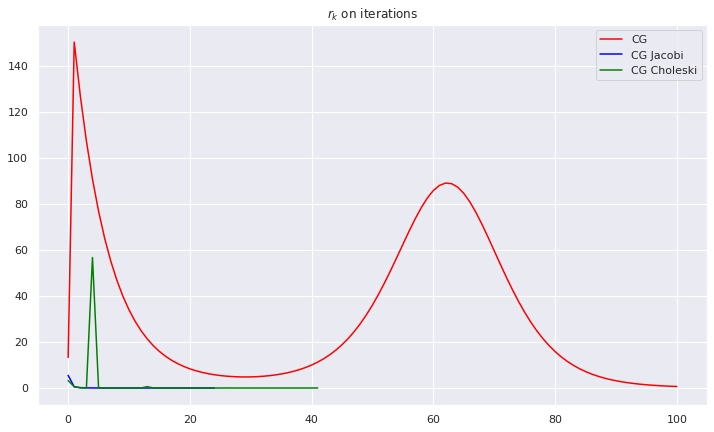

In [0]:
rks = conjugate_grad(A, b)
rks_J = preconditioned_conjugate_grad(A, b, M_jacobi)
rks_Ch = preconditioned_conjugate_grad(A, b, M_kindof_choletski)

plt.plot(rks, label='CG', c='red')
plt.plot(rks_J[1:], label='CG Jacobi', c= 'blue')
plt.plot(rks_Ch[1:], label='CG Choleski', c= 'green')

plt.title(r'$r_k$ on iterations')
plt.legend()
fig = plt.gcf()
fig.set_size_inches(12, 7)

## Problem 4. Barrier methods

Идея барьерных методов довольно проста: давайте заменим задачу условной оптимизации на последовательность модифицированных задач безусловной оптимизации, которая сходится к исходной. Рассмотрим простой пример такой задачи.

$$
\begin{split}
\min_{x \in \mathbb{R}^n} & c^\top x \\
Ax & \leq b
\end{split}
$$

Вместо этого предлагается рассмотреть задачу безусловной оптимизации:

$$
\min_{x \in \mathbb{R}^n}  c^\top x + \frac{1}{t} \sum\limits_{i=1}^m \left[ -\ln\left(-(a_i^\top x - b_i)\right) \right]
$$

По сути, все ограничения типа неравенств инкорпорируются в целевую функцию как **барьерные функции** с помощью (например) логарифмического барьера $-\ln{-h(x)}$ при $t \to \infty$ (см. картинку ниже)

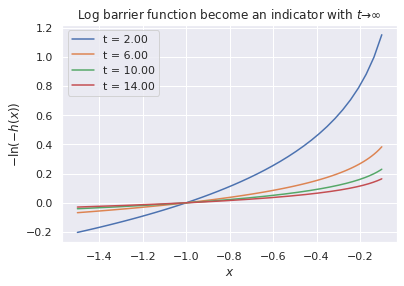

In [0]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

t = np.linspace(2,14, 4)

for t_ in t:
    x = np.linspace(-1.5,-0.1, 20 * int(t_))
    y = -np.log(-x)
    plt.plot(x,y/t_, label = f't = {t_:.2f}')

plt.title(f'Log barrier function become an indicator with $t \\to \infty$')
plt.ylabel(f'$-\ln(-h(x))$')
plt.xlabel(f'$x$')
plt.legend()
plt.show()

Таким образом, формируется последовательности вспомогательных задач, в которых барьерная функция практически ничего не добавляет к исходной функции, но начинает заметно штрафовать по мере приближения к границе бюджетного множества. 

Алгоритм можно сформулировать следующим образом:
* $t = t_0 >0$, $x_0 \in S$ - корректная инициализация

Повторять для $\mu > 1$ и $k = 1,2,3,\ldots$

* Шаг оптимизационного алгоритма для функции $t_k f(x_k) + \varphi(x_k)$ $\to x_{k+1}$
* если $\frac{m}{t} \leq \varepsilon$ - конец алгоритма
* Увеличить $t$: $t_{k+1} = \mu t_k$

Постройте график количества итераций, необходимых для достижения $\varepsilon = 10^{-8}$ точности для $n=50, m = 100$ в зависимости от значения параметра $\mu$.

Рассмотрите при этом метод Ньютона для целевой функции с фиксированным шагом или демпфированный метод Ньютона. (По [ссылке](https://statweb.stanford.edu/~candes/teaching/acm113/Handouts/sumt.pdf) доступен код на матлабе для решения задачи, можно в него смотреть и понять, как делать эту задачу.)

Рассмотрите значения $\mu$ в интервале $[2, 1000]$ с помощью функции `mus = np.linspace(2,1000)`

In [0]:
import numpy as np
def f_grad_hess(t, x, A, b, c):
    m = A.shape[0]
    n = A.shape[1]
    d = A @ x - b
    D = np.diag(1.0 / d)
    try:
        f = t * (c @ x) - np.log((-1) * d) @ np.ones(m)
    except:
        print(d)
    g = t * c - A.T @ D @ np.ones(m)
    h = A.T @ D @ D @ A
    return f, g, h

def Opt_wtf_imize(A, b, c, x0, t0, f_g_h, tol, mu):
    t = t0
    x = x0
    count = 1
    while t <= 1e8:
        for _ in range(500):
            func, grad, hess = f_g_h(t, x, A, b, c)             
            v = np.linalg.solve(hess, (-1) * grad)
            x = x + v
            lambd = v @ grad
            if abs(0.5 * lambd) < tol:
                break
                break
        t = t * mu    
        count += 1    
    return count

In [0]:
m = 100 
n = 50

A = np.random.rand(m, n)
b = 1 + abs(np.random.rand(m))
c = abs(np.random.rand(n))
x0 = np. zeros(n)
t0 = 1 

In [0]:
mus = np.linspace(2,1000)
num_iters = []
for mu in mus:
    a = Opt_wtf_imize(A, b, c, x0, t0, f_grad_hess, 1e-8, mu)
    num_iters.append(a)

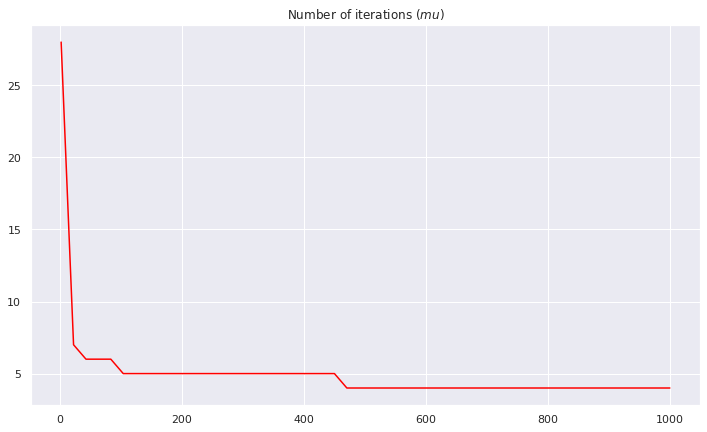

In [0]:
plt.plot(mus, num_iters, c='red')
plt.title(r'Number of iterations ($mu$)')
fig = plt.gcf()
fig.set_size_inches(12, 7)